# 3. Imputation Techniques

Embark on the world of data imputation! In this chapter, you will apply basic imputation techniques to fill in missing data and visualize your imputations to be able to evaluate your imputations' performance.

<font size="5"><b>Mean & median imputation</b></font><br/>

Imputing missing values is the best method when you have large amounts of data to deal with. The simplest methods to impute missing values include filling in a constant or the mean of the variable or other basic statistical parameters like median and mode.

In this exercise, you'll impute the missing values with the mean and median for each of the columns. The DataFrame <mark>diabetes</mark> has been loaded for you. <mark>SimpleImputer()</mark> from <mark>sklearn.impute</mark> has also been imported for you to use.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer

%matplotlib inline

diabetes = pd.read_csv('pima-indians-diabetes data.csv')

In [2]:
# Make a copy of diabetes
diabetes_mean = diabetes.copy(deep=True)

# Create mean imputer object
mean_imputer = SimpleImputer(strategy='mean')

# Impute mean values in the DataFrame diabetes_mean
diabetes_mean.iloc[:, :] = mean_imputer.fit_transform(diabetes_mean)

In [3]:
# Make a copy of diabetes
diabetes_median = diabetes.copy(deep=True)

# Create median imputer object
median_imputer = SimpleImputer(strategy='median')

# Impute median values in the DataFrame diabetes_median
diabetes_median.iloc[:, :] = median_imputer.fit_transform(diabetes_median)

<b>Good job! You've imputed the missing values using mean and median. In the next exercise, you'll impute other statistical values.</b>

<font size="5"><b>Mode and constant imputation</b></font><br/>

Filling in missing values with mean, median, constant and mode is highly suitable when you have to deal with a relatively small amount of missing values. In the previous exercise, you imputed using the mean and median methods. In this exercise, you'll fill in the most frequent values in the column and also perform another imputation by filling in a constant value.

As before, the <mark>diabetes</mark> DataFrame and the function <mark>SimpleImputer()</mark> have been loaded for you.

In [4]:
# Make a copy of diabetes
diabetes_mode = diabetes.copy(deep=True)

# Create mode imputer object
mode_imputer = SimpleImputer(strategy='most_frequent')

# Impute using most frequent value in the DataFrame mode_imputer
diabetes_mode.iloc[:, :] = mode_imputer.fit_transform(diabetes_mode)

In [5]:
# Make a copy of diabetes
diabetes_constant = diabetes.copy(deep=True)

# Create constant imputer object
constant_imputer = SimpleImputer(strategy='constant', fill_value=0)

# Impute missing values to 0 in diabetes_constant
diabetes_constant.iloc[:, :] = constant_imputer.fit_transform(diabetes_constant)

<b>What a streak! You're doing great! You have learned to impute missing data using basic imputation techniques!</b>

<font size="5"><b>Visualize imputations</b></font><br/>

Analyzing imputations and choosing the best one, is a task that requires lots of experimentation. It is important to make sure that your data does not become biased while imputing. In this last two exercises, you created 4 different imputations using mean, median, mode, and constant filling imputations.

In this exercise, you'll create a scatterplot of the DataFrames you imputed previously. To achieve this, you'll create a dictionary of the DataFrames with the keys being their title.

The DataFrames <mark>diabetes_mean</mark>, <mark>diabetes_median</mark>, <mark>diabetes_mode</mark> and <mark>diabetes_constant</mark> have been loaded for you.


<b>Instructions</b>

- Create 4 subplots by making a plot with 2 rows and 2 columns.
- Create the dictionary imputations by mapping each key with its matching DataFrame.
- Loop over axes and imputations, and plot each DataFrame in imputations.
- Set the color to the nullity and the title for each subplot to the name of the imputation.

C:\Users\saqui\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


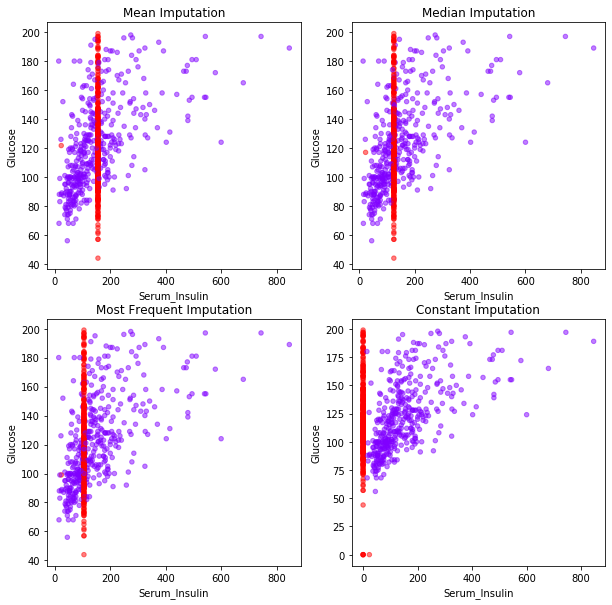

In [6]:
# Set nrows and ncols to 2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
nullity = diabetes.Serum_Insulin.isnull()+diabetes.Glucose.isnull()

# Create a dictionary of imputations
imputations = {'Mean Imputation': diabetes_mean, 'Median Imputation': diabetes_median, 
               'Most Frequent Imputation': diabetes_mode, 'Constant Imputation': diabetes_constant}

# Loop over flattened axes and imputations
for ax, df_key in zip(axes.flatten(), imputations):
    # Select and also set the title for a DataFrame
    imputations[df_key].plot(x='Serum_Insulin', y='Glucose', kind='scatter', 
                          alpha=0.5, c=nullity, cmap='rainbow', ax=ax, 
                          colorbar=False, title=df_key)
plt.show()

<b>Awesome work. Notice how these imputations are portrayed as a straight line and don't adjust to the shape of the data? In the next lessons, you will learn how to create more dynamic imputations!</b>

<font size="5"><b>Filling missing time-series data</b></font><br/>

Imputing time-series data requires a specialized treatment. Time-series data usually comes with special characteristics such trend, seasonality and cyclicality of which we can exploit when imputing missing values in the data. In the <mark>airquality</mark> DataFrame, you can observe these characteristics. Your goal is to impute the values in such a way that these characteristics are accounted for.

In this exercise, you'll try using the <mark>.fillna()</mark> method to impute time-series data. You will use the forward fill and backward fill strategies for imputing time series data.

In [7]:
airquality = pd.read_csv('air-quality.csv')

In [8]:
# Print prior to imputing missing values
print(airquality[30:40])

# Fill NaNs using forward fill
airquality.fillna(method='ffill', inplace=True)

# Print after imputing missing values
print(airquality[30:40])

          Date  Ozone  Solar  Wind  Temp
30  1976-05-31   37.0  279.0   7.4    76
31  1976-06-01    NaN  286.0   8.6    78
32  1976-06-02    NaN  287.0   9.7    74
33  1976-06-03    NaN  242.0  16.1    67
34  1976-06-04    NaN  186.0   9.2    84
35  1976-06-05    NaN  220.0   8.6    85
36  1976-06-06    NaN  264.0  14.3    79
37  1976-06-07   29.0  127.0   9.7    82
38  1976-06-08    NaN  273.0   6.9    87
39  1976-06-09   71.0  291.0  13.8    90
          Date  Ozone  Solar  Wind  Temp
30  1976-05-31   37.0  279.0   7.4    76
31  1976-06-01   37.0  286.0   8.6    78
32  1976-06-02   37.0  287.0   9.7    74
33  1976-06-03   37.0  242.0  16.1    67
34  1976-06-04   37.0  186.0   9.2    84
35  1976-06-05   37.0  220.0   8.6    85
36  1976-06-06   37.0  264.0  14.3    79
37  1976-06-07   29.0  127.0   9.7    82
38  1976-06-08   29.0  273.0   6.9    87
39  1976-06-09   71.0  291.0  13.8    90


In [9]:
airquality = pd.read_csv('air-quality.csv')

In [10]:
# Print prior to imputing missing values
print(airquality[30:40])

# Fill NaNs using backward fill
airquality.fillna(method='bfill', inplace=True)

# Print after imputing missing values
print(airquality[30:40])

          Date  Ozone  Solar  Wind  Temp
30  1976-05-31   37.0  279.0   7.4    76
31  1976-06-01    NaN  286.0   8.6    78
32  1976-06-02    NaN  287.0   9.7    74
33  1976-06-03    NaN  242.0  16.1    67
34  1976-06-04    NaN  186.0   9.2    84
35  1976-06-05    NaN  220.0   8.6    85
36  1976-06-06    NaN  264.0  14.3    79
37  1976-06-07   29.0  127.0   9.7    82
38  1976-06-08    NaN  273.0   6.9    87
39  1976-06-09   71.0  291.0  13.8    90
          Date  Ozone  Solar  Wind  Temp
30  1976-05-31   37.0  279.0   7.4    76
31  1976-06-01   29.0  286.0   8.6    78
32  1976-06-02   29.0  287.0   9.7    74
33  1976-06-03   29.0  242.0  16.1    67
34  1976-06-04   29.0  186.0   9.2    84
35  1976-06-05   29.0  220.0   8.6    85
36  1976-06-06   29.0  264.0  14.3    79
37  1976-06-07   29.0  127.0   9.7    82
38  1976-06-08   71.0  273.0   6.9    87
39  1976-06-09   71.0  291.0  13.8    90


<b>You have learned to perform imputations using the fillna() method! Continue further to learn more robust imputation techniques.</b>

<font size="5"><b>Impute with interpolate method</b></font><br/>


Time-series data have trends of ups and downs against time. For this, filling flat series of values using methods like forward fill or backward fill is not suitable. A more apt imputation would be to use methods like linear or quadratic imputation, where the values are filled with incrementing or decrementing values.

In this exercise, you will work with the <mark>.interpolate()</mark> method on the <mark>airquality</mark> DataFrame. You will use linear, quadratic and nearest methods. You can also find the detailed list of strategies for interpolation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html)
.

In [11]:
airquality = pd.read_csv('air-quality.csv')

In [12]:
# Print prior to interpolation
print(airquality[30:40])

# Interpolate the NaNs linearly
airquality.interpolate(method='linear', inplace=True)

# Print after interpolation
print(airquality[30:40])

          Date  Ozone  Solar  Wind  Temp
30  1976-05-31   37.0  279.0   7.4    76
31  1976-06-01    NaN  286.0   8.6    78
32  1976-06-02    NaN  287.0   9.7    74
33  1976-06-03    NaN  242.0  16.1    67
34  1976-06-04    NaN  186.0   9.2    84
35  1976-06-05    NaN  220.0   8.6    85
36  1976-06-06    NaN  264.0  14.3    79
37  1976-06-07   29.0  127.0   9.7    82
38  1976-06-08    NaN  273.0   6.9    87
39  1976-06-09   71.0  291.0  13.8    90
          Date      Ozone  Solar  Wind  Temp
30  1976-05-31  37.000000  279.0   7.4    76
31  1976-06-01  35.857143  286.0   8.6    78
32  1976-06-02  34.714286  287.0   9.7    74
33  1976-06-03  33.571429  242.0  16.1    67
34  1976-06-04  32.428571  186.0   9.2    84
35  1976-06-05  31.285714  220.0   8.6    85
36  1976-06-06  30.142857  264.0  14.3    79
37  1976-06-07  29.000000  127.0   9.7    82
38  1976-06-08  50.000000  273.0   6.9    87
39  1976-06-09  71.000000  291.0  13.8    90


In [13]:
airquality = pd.read_csv('air-quality.csv')

In [14]:
# Print prior to interpolation
print(airquality[30:40])

# Interpolate the NaNs quadratically
airquality.interpolate(method='quadratic', inplace=True)

# Print after interpolation
print(airquality[30:40])

          Date  Ozone  Solar  Wind  Temp
30  1976-05-31   37.0  279.0   7.4    76
31  1976-06-01    NaN  286.0   8.6    78
32  1976-06-02    NaN  287.0   9.7    74
33  1976-06-03    NaN  242.0  16.1    67
34  1976-06-04    NaN  186.0   9.2    84
35  1976-06-05    NaN  220.0   8.6    85
36  1976-06-06    NaN  264.0  14.3    79
37  1976-06-07   29.0  127.0   9.7    82
38  1976-06-08    NaN  273.0   6.9    87
39  1976-06-09   71.0  291.0  13.8    90
          Date      Ozone  Solar  Wind  Temp
30  1976-05-31  37.000000  279.0   7.4    76
31  1976-06-01 -38.361123  286.0   8.6    78
32  1976-06-02 -79.352735  287.0   9.7    74
33  1976-06-03 -85.974836  242.0  16.1    67
34  1976-06-04 -62.354606  186.0   9.2    84
35  1976-06-05 -33.255133  220.0   8.6    85
36  1976-06-06  -2.803598  264.0  14.3    79
37  1976-06-07  29.000000  127.0   9.7    82
38  1976-06-08  62.155660  273.0   6.9    87
39  1976-06-09  71.000000  291.0  13.8    90


In [15]:
airquality = pd.read_csv('air-quality.csv')

In [16]:
# Print prior to interpolation
print(airquality[30:40])

# Interpolate the NaNs with nearest value
airquality.interpolate(method='nearest',inplace=True)

# Print after interpolation
print(airquality[30:40])

          Date  Ozone  Solar  Wind  Temp
30  1976-05-31   37.0  279.0   7.4    76
31  1976-06-01    NaN  286.0   8.6    78
32  1976-06-02    NaN  287.0   9.7    74
33  1976-06-03    NaN  242.0  16.1    67
34  1976-06-04    NaN  186.0   9.2    84
35  1976-06-05    NaN  220.0   8.6    85
36  1976-06-06    NaN  264.0  14.3    79
37  1976-06-07   29.0  127.0   9.7    82
38  1976-06-08    NaN  273.0   6.9    87
39  1976-06-09   71.0  291.0  13.8    90
          Date  Ozone  Solar  Wind  Temp
30  1976-05-31   37.0  279.0   7.4    76
31  1976-06-01   37.0  286.0   8.6    78
32  1976-06-02   37.0  287.0   9.7    74
33  1976-06-03   37.0  242.0  16.1    67
34  1976-06-04   29.0  186.0   9.2    84
35  1976-06-05   29.0  220.0   8.6    85
36  1976-06-06   29.0  264.0  14.3    79
37  1976-06-07   29.0  127.0   9.7    82
38  1976-06-08   29.0  273.0   6.9    87
39  1976-06-09   71.0  291.0  13.8    90


<b>Interpolation methods can impute missing data with more complex patterns. You will analyze and further understand these imputations and compare them in the next lesson!</b>

<font size="5"><b>Visualize forward fill imputation</b></font><br/>

To visualize time-series imputations, we can create two plots with the plot of original DataFrame overlapping the imputed DataFrame. Additionally, changing the <mark>linestyle</mark>, <mark>color</mark> and <mark>marker</mark> for the imputed DataFrame, helps to clearly distinguish the non-missing values and the imputed values. The imputed DataFrames can be plotted using the <mark>.plot()</mark> method.

In this exercise, you will first impute and then plot the time-series plot of forward filled DataFrame. The <mark>airquality</mark> DataFrame has been loaded for you.

In [17]:
airquality = pd.read_csv('air-quality.csv')

In [18]:
# Impute airquality DataFrame with ffill method
ffill_imputed = airquality.fillna(method='ffill')

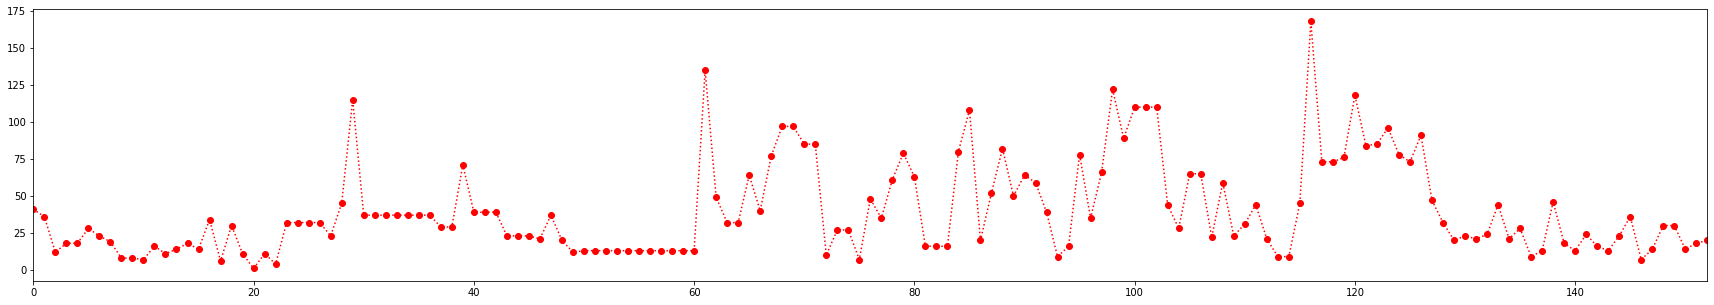

In [19]:
# Impute airquality DataFrame with ffill method
ffill_imputed = airquality.fillna(method='ffill')

# Plot the imputed DataFrame ffill_imp in red dotted style 
ffill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

plt.show()

- Overlay the airquality DataFrame on top of your plot.
- Set the title to 'Ozone' and set marker to 'o'.

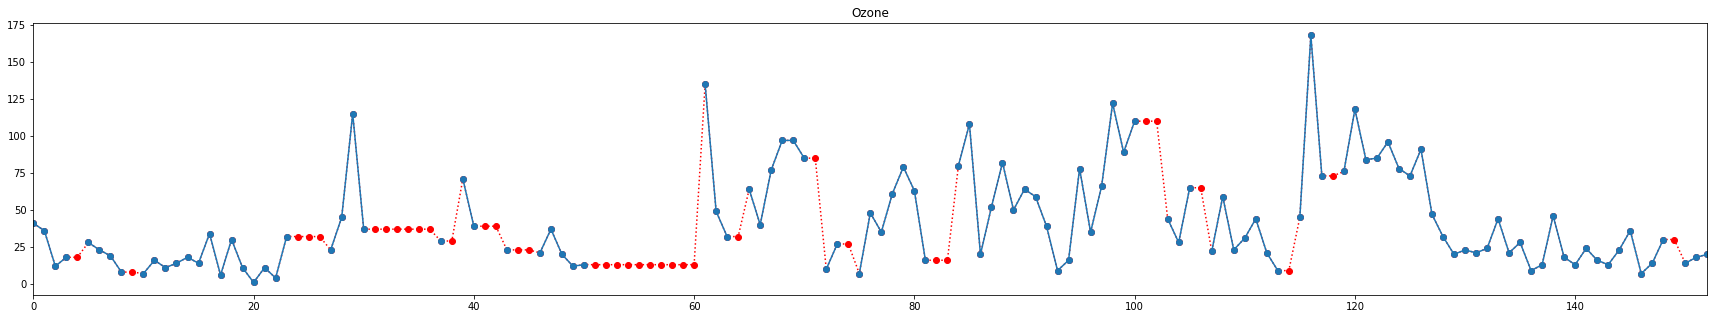

In [20]:
# Impute airquality DataFrame with ffill method
ffill_imputed = airquality.fillna(method='ffill')

# Plot the imputed DataFrame ffill_imp in red dotted style 
ffill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

<b>Good going! You can observe that forwar fill is not at par with the required imputations. You'll further explore other approaches to impute the data!</b>

<font size="5"><b>Visualize backward fill imputation</b></font><br/>

To understand the quality of imputations, it is important to analyze how the imputations vary with respect to the actual dataset. The quickest way to do so is by visualizing the imputations.

In the previous exercise, you visualized the time-series forward filled imputation of <mark>airquality</mark> DataFrame. In this exercise, you will visualize the backward filled <mark>imputation</mark> of airquality DataFrame.

In [21]:
airquality = pd.read_csv('air-quality.csv')

In [22]:
# Impute airquality DataFrame with bfill method
bfill_imputed = airquality.fillna(method='bfill')

- Create a red colored line plot of bfill_imp with a 'dotted' line style with 'o' for markers.

In [23]:
airquality = pd.read_csv('air-quality.csv')

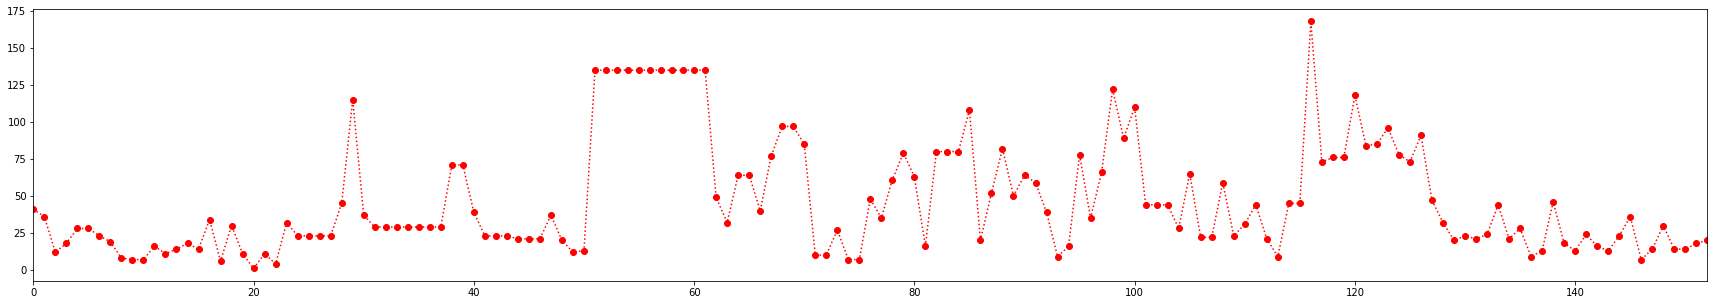

In [24]:
# Impute airquality DataFrame with bfill method
bfill_imputed = airquality.fillna(method='bfill')

# Plot the imputed DataFrame bfill_imp in red dotted style 
bfill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

plt.show()

- Overlay the airquality DataFrame on top of your plot.
- Set the title to 'Ozone' and set marker to 'o'.

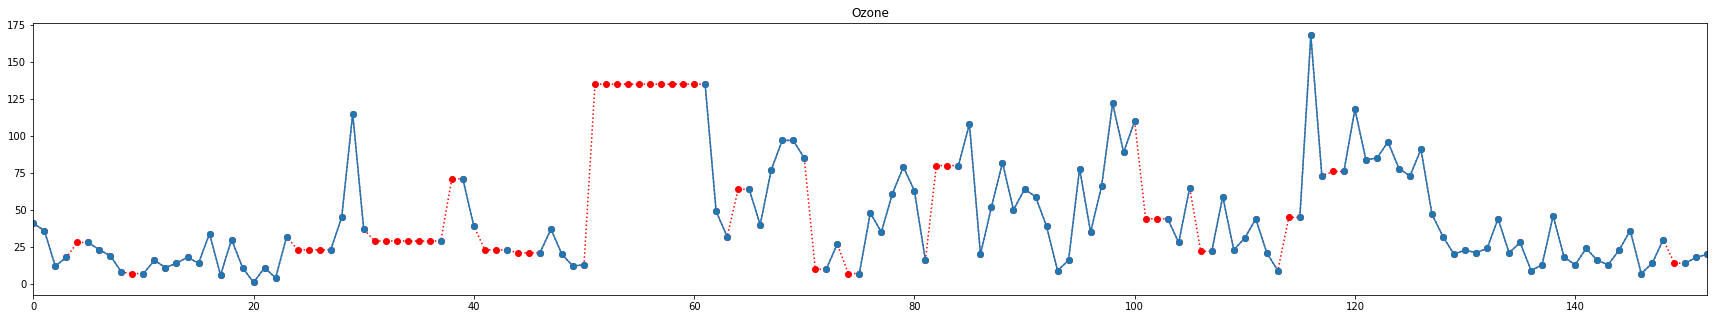

In [25]:
# Impute airquality DataFrame with bfill method
bfill_imputed = airquality.fillna(method='bfill')

# Plot the imputed DataFrame bfill_imp in red dotted style 
bfill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

<b>Similar to forward fill, you observe that backward fill also does not perform satisfactorily. Let's try interpolating the values and comparing them!</b>

<font size="5"><b>Plot interpolations</b></font><br/>

Plotting comparative graphs for the imputations is essential for inferring the best imputation technique. In this exercise, you'll create a for loop for generating plots for multiple imputation techniques. You will create the plots of the imputations you completed in the previous lesson which were the linear, quadratic, and nearest interpolation techniques.

Three DataFrames named after their respective imputation techniques <mark>linear</mark>, <mark>quadratic</mark>, and <mark>nearest</mark> have been already imported for you.

<b>Instructions</b>
- Create 3 subplots for each plot, using 3 rows and 1 column.
- Create the interpolations dictionary by mapping each DataFrame to the corresponding interpolation technique.
- Loop over axes and interpolations.
- Select each DataFrame in interpolations and set the title for a DataFrame using df_key.

In [26]:
linear = pd.read_csv('air-quality.csv')
# Interpolate the NaNs with linear value
linear.interpolate(method='linear',inplace=True)

quadratic = pd.read_csv('air-quality.csv')
# Interpolate the NaNs with linear value
quadratic.interpolate(method='quadratic',inplace=True)

nearest = pd.read_csv('air-quality.csv')
# Interpolate the NaNs with linear value
nearest.interpolate(method='nearest',inplace=True)

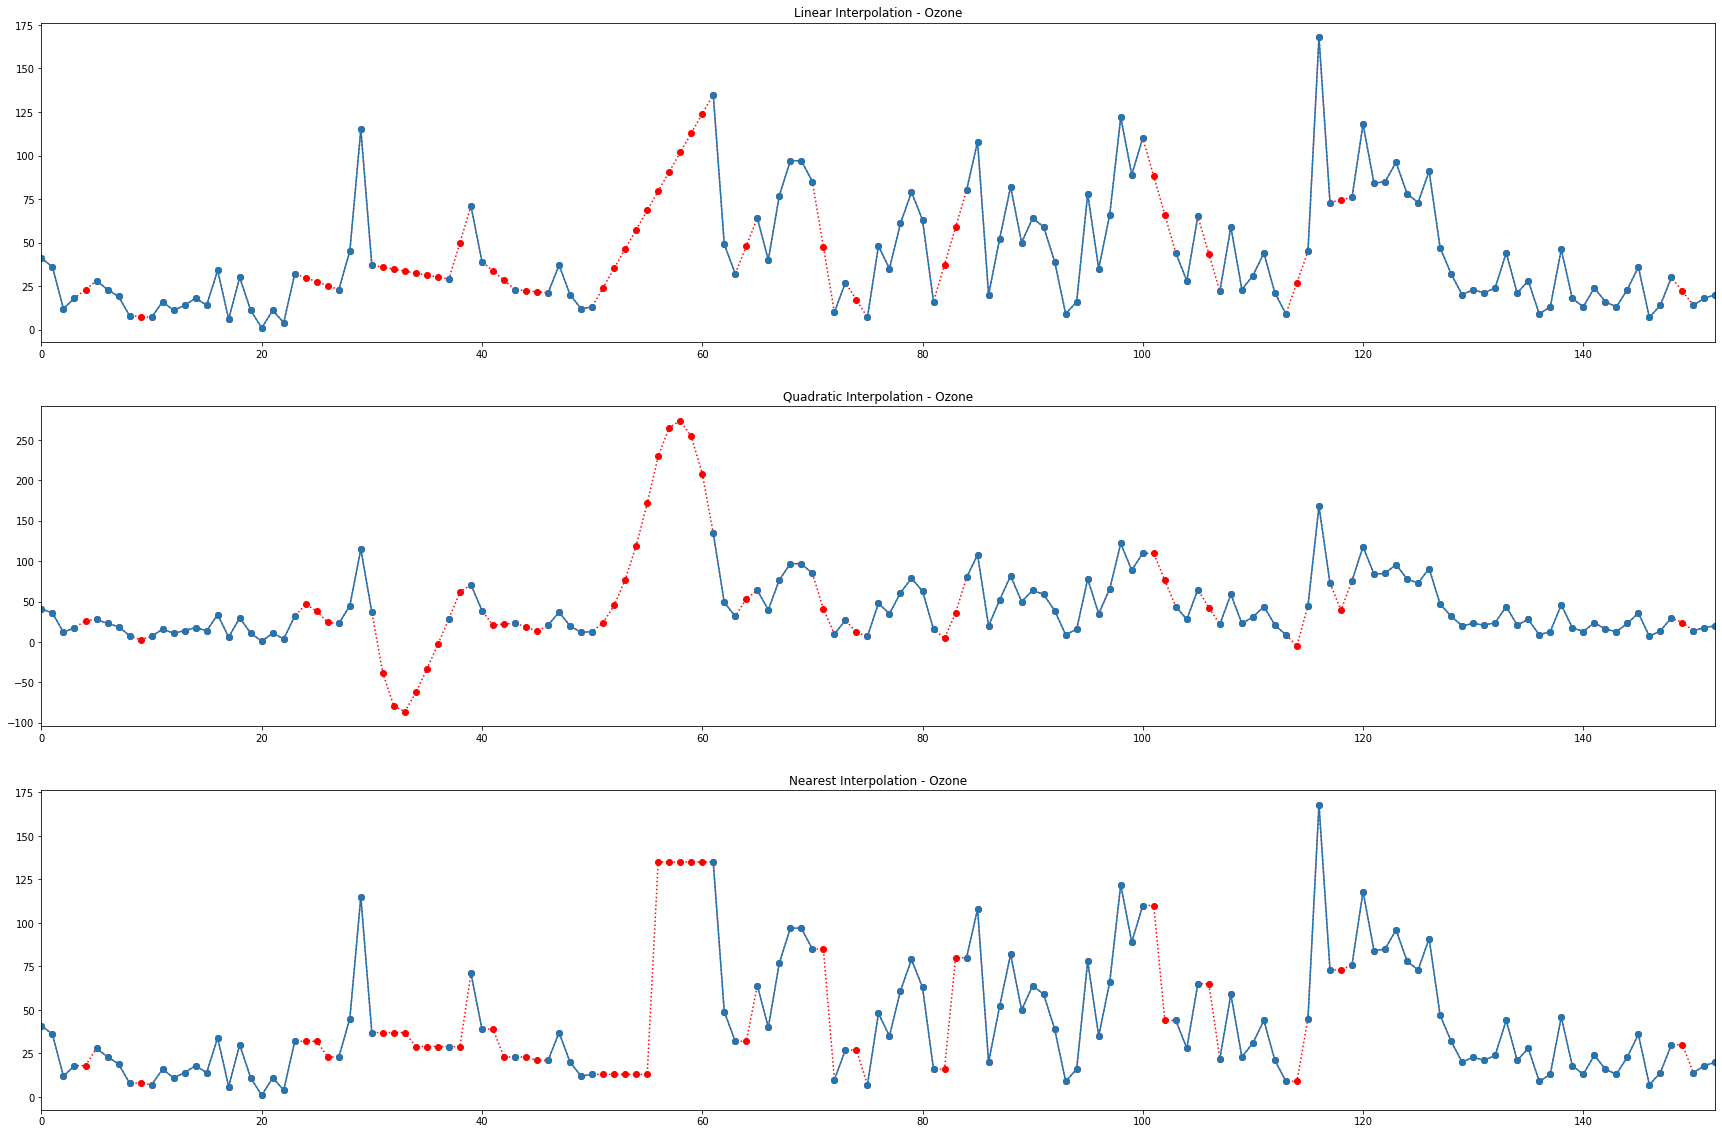

In [27]:
# Set nrows to 3 and ncols to 1
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 20))

# Create a dictionary of interpolations
interpolations = {'Linear Interpolation': linear, 'Quadratic Interpolation': quadratic, 
                  'Nearest Interpolation': nearest}

# Loop over axes and interpolations
for ax, df_key in zip(axes, interpolations):
  # Select and also set the title for a DataFrame
  interpolations[df_key].Ozone.plot(color='red', marker='o', 
                                 linestyle='dotted', ax=ax)
  airquality.Ozone.plot(title=df_key + ' - Ozone', marker='o', ax=ax)
  
plt.show()

<b>Congratulaions on completing this chapter! You've learnt to impute, visualize and compare your imputations.</b>